### Importing necessary libraries

In [127]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
import sweetviz
import warnings

In [128]:
# Model building Imports
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

### Data Collection

In [2]:
cdf = pd.read_csv('zomato_restaurants_in_India.csv')

In [3]:
cdf.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
cdf.shape

(211944, 26)

### Data definition

In [5]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [6]:
cdf.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


### Data cleaning

 Handling Duplicates

In [7]:
# Duplicate values need to remove to avoid deviation,since res_id is unique identifier for restaurants, we use to remove 
#duplicates
cdf = cdf.drop_duplicates(subset='res_id')
cdf.shape

(55568, 26)

Almost 75% of records got removed 

Handling missing Values

In [8]:
cdf.isnull().values.any()

True

In [9]:
cdf.isnull().sum() #Checking for null values

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [10]:
cdf.isnull().mean()*100

res_id                   0.000000
name                     0.000000
establishment            0.000000
url                      0.000000
address                  0.032393
city                     0.000000
city_id                  0.000000
locality                 0.000000
latitude                 0.000000
longitude                0.000000
zipcode                 80.303412
country_id               0.000000
locality_verbose         0.000000
cuisines                 0.845811
timings                  1.804996
average_cost_for_two     0.000000
price_range              0.000000
currency                 0.000000
highlights               0.000000
aggregate_rating         0.000000
rating_text              0.000000
votes                    0.000000
photo_count              0.000000
opentable_support        0.021595
delivery                 0.000000
takeaway                 0.000000
dtype: float64

In [11]:
# Its better to drop zipcode column since it has 80% of null values which cannot be imputed.
cdf.drop(['zipcode'], axis=1, inplace=True)

In [12]:
cdf.shape

(55568, 25)

* Identifying not useful columns from dataset for further analysis

In [13]:
#res_id - Unique ID for each restaurant
#name - Name is useful since we will use for finding top restaurants
cdf['name'].unique()

array(['Bikanervala', 'Mama Chicken Mama Franky House', 'Bhagat Halwai',
       ..., 'Red China', 'Wah Ustad', 'Geeta lodge'], dtype=object)

In [14]:
#establishment - Let's see what type of values we have in establishment
cdf['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

* Seems establishment column need some changes

In [15]:
print(cdf["establishment"].unique()[0])
print(type(cdf["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


In [16]:
# Removing [' '] from each value
cdf['establishment'] = cdf['establishment'].apply(lambda x:x[2:-2])
cdf['establishment'].unique()[0]

'Quick Bites'

In [17]:
cdf['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', '', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

In [18]:
# Changing ''  to 'NA'
print(cdf["establishment"].unique())
cdf["establishment"] = cdf["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(cdf["establishment"].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [19]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'country_id', 'locality_verbose',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'currency', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [20]:
cdf['url']

0         https://www.zomato.com/agra/bikanervala-khanda...
1         https://www.zomato.com/agra/mama-chicken-mama-...
2         https://www.zomato.com/agra/bhagat-halwai-2-sh...
3         https://www.zomato.com/agra/bhagat-halwai-civi...
4         https://www.zomato.com/agra/the-salt-cafe-kitc...
                                ...                        
211882    https://www.zomato.com/vadodara/shree-janta-ic...
211925    https://www.zomato.com/vadodara/the-grand-thak...
211926    https://www.zomato.com/vadodara/geeta-lodge-al...
211940    https://www.zomato.com/vadodara/raju-omlet-kar...
211942    https://www.zomato.com/vadodara/subway-1-akota...
Name: url, Length: 55568, dtype: object

In [21]:
cdf['address']

0         Kalyani Point, Near Tulsi Cinema, Bypass Road,...
1               Main Market, Sadar Bazaar, Agra Cantt, Agra
2         62/1, Near Easy Day, West Shivaji Nagar, Goalp...
3         Near Anjana Cinema, Nehru Nagar, Civil Lines, ...
4               1C,3rd Floor, Fatehabad Road, Tajganj, Agra
                                ...                        
211882    Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...
211925    3rd Floor, Shreem Shalini Mall, Opposite Conqu...
211926    Shop 11, Ground Floor, Atlantis K-10, Tower A,...
211940    Mahalaxmi Apartment, Opposite B O B, Karoli Ba...
211942    G-2, Vedant Platina, Near Cosmos, Akota, Vadodara
Name: address, Length: 55568, dtype: object

In [22]:
# Dropping objective features ['url', 'address']
cdf.drop(['url','address'],axis=1,inplace=True)

In [23]:
cdf.shape

(55568, 23)

In [24]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'city', 'city_id', 'locality',
       'latitude', 'longitude', 'country_id', 'locality_verbose', 'cuisines',
       'timings', 'average_cost_for_two', 'price_range', 'currency',
       'highlights', 'aggregate_rating', 'rating_text', 'votes', 'photo_count',
       'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [25]:
cdf['city'].nunique()

99

In [26]:
#Still there are some features which are not necessary i.e we have columns like 'city_id, locality, locality_verbose'. In which
# column city is equivalent, similarly 'country_id' column is not required since this dataset belongs to indian restaurents, so 
#currency will be the same, so dropping 'locality', 'locality_verbose','latitude', 'longitude', 'country_id''currency' columns also.
cdf.drop(['locality', 'locality_verbose', 'latitude', 'longitude', 'country_id', 'currency'],axis=1, inplace=True)

In [27]:
cdf.drop(['city_id'],axis=1,inplace=True)

In [28]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'city', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [29]:
cdf['cuisines'].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [30]:
# Cuisines column has some missing values and also have to be seperated the unique cuisines 
cdf['cuisines'] = cdf["cuisines"].fillna("No cuisine")

In [31]:
cuisines = []
cdf["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


In [32]:
cuisines.unique()

array(['North Indian', 'South Indian', 'Mithai', 'Street Food',
       'Desserts', 'Mughlai', 'Rolls', 'Chinese', 'Fast Food', 'Bakery',
       'Continental', 'Italian', 'Pizza', 'Cafe', 'Burger', 'Wraps',
       'Beverages', 'Rajasthani', 'Mexican', 'Healthy Food', 'Sandwich',
       'Salad', 'Momos', 'Lebanese', 'Mediterranean', 'Thai', 'Gujarati',
       'Indian', 'Finger Food', 'European', 'Tea', 'Asian', 'Bar Food',
       'Kebab', 'Paan', 'Biryani', 'Juices', 'Ice Cream', 'Japanese',
       'Korean', 'Afghan', 'Awadhi', 'No cuisine', 'Hyderabadi',
       'Lucknowi', 'Roast Chicken', 'Drinks Only', 'Coffee', 'American',
       'BBQ', 'Maharashtrian', 'Modern Indian', 'Andhra', 'Konkan',
       'Kerala', 'Sushi', 'Parsi', 'Greek', 'Bengali', 'Seafood',
       'Frozen Yogurt', 'Arabian', 'Indonesian', 'Sindhi', 'Hot dogs',
       'Goan', 'Charcoal Chicken', 'Raw Meats', 'Grill', 'Malwani',
       'Cantonese', 'Pakistani', 'Steak', 'Vietnamese', 'Singaporean',
       'Middle Eastern'

In [33]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'city', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [34]:
#'timings' column
print(cdf.timings.nunique())
print(cdf.timings.unique())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


In [35]:
# since the 'timings' column has missing values and not structured properly, its better to drop this column
cdf.drop(['timings'],axis=1,inplace=True)

In [36]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'city', 'cuisines',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [37]:
cdf['average_cost_for_two'].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

In [38]:
cdf['price_range'].unique()

array([2, 1, 3, 4], dtype=int64)

In [39]:
print(cdf["highlights"].nunique())
print(cdf["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [40]:
# seperating highlights values
hl_sub = []
cdf['highlights'].apply(lambda x: hl_sub.extend(x[2:-2].split("', '")))
hl_sub = pd.Series(hl_sub)
print("Total number of unique highlights = ", hl_sub.nunique())
print(hl_sub.unique())

Total number of unique highlights =  104
['Lunch' 'Takeaway Available' 'Credit Card' 'Dinner' 'Cash'
 'Air Conditioned' 'Indoor Seating' 'Pure Veg' 'Delivery'
 'No Alcohol Available' 'Breakfast' 'Outdoor Seating' 'Self Service'
 'Digital Payments Accepted' 'Desserts and Bakes' 'Smoking Area'
 'Dance Floor' 'Serves Alcohol' 'Debit Card' 'Wine' 'Live Music' 'Rooftop'
 'Live Sports Screening' 'Fullbar' 'Beer' 'Serves Cocktails'
 'Table booking recommended' 'Available for Functions' 'Resto Bar'
 'Hookah' 'Wifi' 'DJ' 'Live Entertainment' 'City View' 'Free Parking'
 'Free Wifi' 'Table booking not available'
 'Table Reservation Not Required' 'Axis Bank - Dining Delights'
 'No Seating Available' 'Buffet' 'Serves Jain Food' 'Poolside'
 'Table reservation required' 'Restricted Entry' 'Valet Parking Available'
 'Sodexo' '4/5 Star' 'Karaoke' 'Kid Friendly'
 'Private Dining Area Available' 'Nightlife' 'Gluten Free Options'
 'Luxury Dining' 'Wheelchair Accessible' 'Above 18 Only'
 'Pre-Ordering Requ

In [41]:
cdf.columns


Index(['res_id', 'name', 'establishment', 'city', 'cuisines',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [42]:
cdf[['aggregate_rating','votes','photo_count']].describe()

,aggregate_rating,votes,photo_count
count,55568.000000,55568.000000,55568.000000
mean,2.958593,223.330352,160.974770
std,1.464576,618.224019,586.975382
min,0.000000,-18.000000,0.000000
25%,2.900000,6.000000,1.000000
50%,3.500000,35.000000,10.000000
75%,3.900000,175.000000,69.000000
max,4.900000,42539.000000,17702.000000


In [43]:
cdf['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Bardzo dobrze', 'Muito Bom', 'İyi', 'Çok iyi', 'Baik',
       'Sangat Baik', 'Skvělé', 'Muy Bueno', 'Průměr', 'Ortalama',
       'Skvělá volba', 'Muito bom', 'Velmi dobré', 'Excelente', 'Bom',
       'Scarso', 'Promedio', 'Vynikajúce', 'Bueno', 'Dobré', 'Terbaik',
       'Harika', 'Veľmi dobré', 'Eccellente', 'Buono', 'Média', 'Dobrze'],
      dtype=object)

In [44]:
#dropping 'rating_text' since we use aggregate_rating 
cdf.drop(['rating_text'],axis=1,inplace=True)

In [45]:
cdf.opentable_support.unique()

array([ 0., nan])

In [46]:
#dropping 'opentable_support' since it has no true values
cdf.drop(['opentable_support'],axis=1,inplace=True)

In [47]:
cdf['delivery'].unique()

array([-1,  1,  0], dtype=int64)

In [48]:
cdf['takeaway'].unique()

array([-1], dtype=int64)

In [49]:
# Assuming -1 is a data entry error, so -1 is to be encoded as 1 for both delivery and takeaway

cdf['delivery'] = cdf['delivery'].replace(-1, 1)
cdf['takeaway'] = cdf['takeaway'].replace(-1, 1)

In [50]:
print(cdf.delivery.value_counts(normalize=True)) #99% offer delivery, 1% don't
print('****************************************')
print(cdf['takeaway'].value_counts(normalize=True)) #100% takeaways

1    0.994331
0    0.005669
Name: delivery, dtype: float64
****************************************
1    1.0
Name: takeaway, dtype: float64


In [51]:
# res_id now is just an identifier, and isn't of much use, so dropping this column.
cdf.drop(['res_id'],axis=1,inplace=True)

In [52]:
cdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,55568,41100,Domino's Pizza,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
establishment,55568,27,Quick Bites,14032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,55568,99,Bangalore,2247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisines,55568,9383,North Indian,4295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_cost_for_two,55568.0,NaN,NaN,NaN,528.205874,595.028447,0.0,200.0,350.0,600.0,30000.0
price_range,55568.0,NaN,NaN,NaN,1.714728,0.878227,1.0,1.0,1.0,2.0,4.0
highlights,55568,31228,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aggregate_rating,55568.0,NaN,NaN,NaN,2.958593,1.464576,0.0,2.9,3.5,3.9,4.9
votes,55568.0,NaN,NaN,NaN,223.330352,618.224019,-18.0,6.0,35.0,175.0,42539.0
photo_count,55568.0,NaN,NaN,NaN,160.974770,586.975382,0.0,1.0,10.0,69.0,17702.0


### Fixing incorrect Data Types

In [53]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55568 entries, 0 to 211942
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  55568 non-null  object 
 1   establishment         55568 non-null  object 
 2   city                  55568 non-null  object 
 3   cuisines              55568 non-null  object 
 4   average_cost_for_two  55568 non-null  int64  
 5   price_range           55568 non-null  int64  
 6   highlights            55568 non-null  object 
 7   aggregate_rating      55568 non-null  float64
 8   votes                 55568 non-null  int64  
 9   photo_count           55568 non-null  int64  
 10  delivery              55568 non-null  int64  
 11  takeaway              55568 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.5+ MB


In [73]:
#delivery, takeaway and price_range columns are categorical and are stored as int, so this needs to be fixed.
cdf['delivery'] = cdf['delivery'].astype(object)
cdf['takeaway'] = cdf['takeaway'].astype(object)
cdf['price_range'] = cdf['price_range'].astype(object)

In [75]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55568 entries, 0 to 211942
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  55568 non-null  object 
 1   establishment         55568 non-null  object 
 2   city                  55568 non-null  object 
 3   cuisines              55568 non-null  object 
 4   average_cost_for_two  54748 non-null  float64
 5   price_range           55568 non-null  object 
 6   highlights            55568 non-null  object 
 7   aggregate_rating      45510 non-null  float64
 8   votes                 55568 non-null  int64  
 9   photo_count           55568 non-null  int64  
 10  delivery              55568 non-null  object 
 11  takeaway              55568 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.5+ MB


### EDA Report by Sweetviz Package on the Cleaned Data

In [76]:
report_trim = sweetviz.analyze(cdf)
report_trim.show_html('cleaned_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report cleaned_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


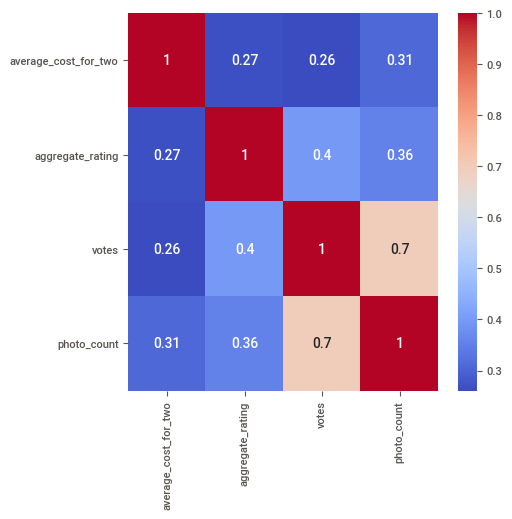

In [77]:
#Checking the correlation between the dataset columns
plt.figure(figsize=(5,5))
sns.heatmap(cdf.corr(), cmap='coolwarm', annot=True)
plt.show()

In [78]:
# Price_range and avgerage_cost_per_two are highly correlted and photo_count and votes are also highly correlated.
# rest all remains inacceptable range

### Exploring The Dependent Variable(aggregate_rating)

In [79]:
cdf.aggregate_rating.value_counts(ascending=True)

1.8       2
1.9       4
2.0      10
2.1      28
2.2      65
4.9     130
4.8     142
2.3     167
4.7     239
2.4     300
2.5     396
4.6     428
2.6     570
4.5     682
2.7     856
4.4    1070
2.8    1156
2.9    1488
3.0    1595
4.3    1612
3.1    1779
4.2    2194
4.1    2757
3.5    2757
3.3    2783
3.4    2789
3.2    2911
3.6    3004
4.0    3307
3.7    3324
3.8    3428
3.9    3537
Name: aggregate_rating, dtype: int64

In [80]:
# Here in our dependent variable rating '0' represents not rated(reffered from rating text column)
# Replacing such values with NaN so that these NaN values can be filled with mean or median values so that model may not =

In [81]:
cdf['aggregate_rating'] = cdf['aggregate_rating'].replace(0, np.nan)
cdf['average_cost_for_two'] = cdf['average_cost_for_two'].replace(0, np.nan)

In [82]:
cdf[cdf['aggregate_rating'] == 0]


,name,establishment,city,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,votes,photo_count,delivery,takeaway


In [83]:
# Extracting Not Null values only
cdf_nn = cdf[pd.notnull(cdf['aggregate_rating'])]

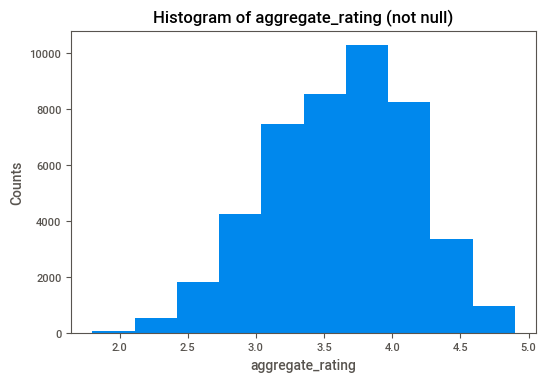

In [84]:
plt.hist(cdf_nn['aggregate_rating'])
plt.title('Histogram of aggregate_rating (not null)')
plt.xlabel('aggregate_rating')
plt.ylabel('Counts')
plt.show()

In [85]:
# Imputing missing values for average_cost_for_two
cdf_nn['average_cost_for_two'].fillna(cdf_nn['average_cost_for_two'].median(), inplace=True)

F:\AnacondA\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


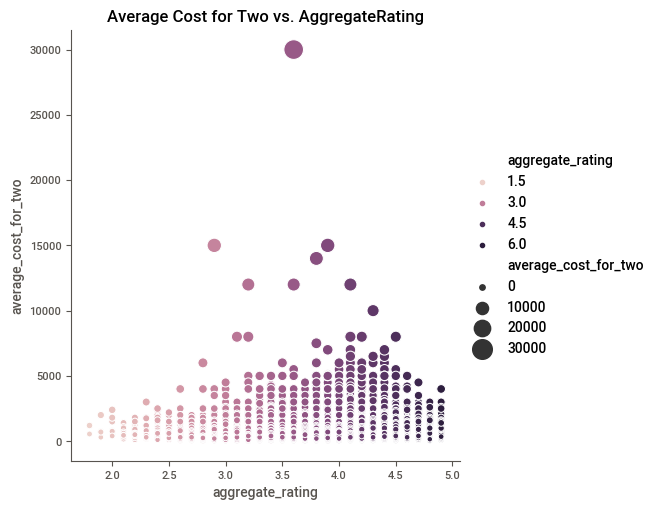

In [86]:
sns.relplot(y = 'average_cost_for_two', x = 'aggregate_rating', size='average_cost_for_two', hue = 'aggregate_rating',
            sizes= (15,200), data = cdf_nn)
plt.title("Average Cost for Two vs. AggregateRating")

plt.show()

In [87]:
# # # Checking Sweetviz report again on this trimmed and cleaned version of the data

report_trim = sweetviz.analyze(cdf)
report_trim.show_html('data_trim.html')

                                             |          | [  0%]   00:00 -> (? left)

Report data_trim.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Exploring the text columns

In [90]:
# Establishment
cdf_nn.establishment[0].replace('[','').replace(']','').replace("'",'')

cdf_nn.establishment=cdf_nn.establishment.apply(lambda x:x.replace('[','').replace(']','').replace("'",''))

F:\AnacondA\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [91]:
cdf_nn['establishment'].value_counts(dropna=False).head()

Quick Bites        11955
Casual Dining      10754
Café                3574
Dessert Parlour     3090
Bakery              2734
Name: establishment, dtype: int64

Quick Bites, Casual Dining, Cafe are the dominant establishment types


In [92]:
# Highlights
cdf_nn.highlights[0].replace('[','').replace(']','').replace("'",'')

cdf_nn.highlights=cdf_nn.highlights.apply(lambda x:x.replace('[','').replace(']','').replace("'",''))

In [93]:
cdf_nn['highlights'].value_counts().head()


Dinner, Takeaway Available, Lunch, Cash, Indoor Seating                                                        617
Dinner, Delivery, Lunch, Cash, Takeaway Available, Indoor Seating                                              487
                                                                                                               260
Cash, Takeaway Available                                                                                       219
Dinner, Cash, Takeaway Available, Debit Card, Lunch, Delivery, Credit Card, Indoor Seating, Air Conditioned    205
Name: highlights, dtype: int64

In [95]:
# Since I want to do some analysis on the highlights vs ratings,
# it is better tosplit the values of each record to extract different words, 
# Else, the whole data frame will become really cluttered
subset = cdf_nn[['highlights', 'aggregate_rating']]

In [96]:
highlight_split = subset['highlights'].str.get_dummies(sep = ",")

highlight_split

,4/5 Star,Above 18 Only,Air Conditioned,Alipay Accepted,All Day Breakfast,Available for Functions,Axis Bank - Dining Delights,BYOB,Beer,Bira 91 Beer,...,Outdoor Seating,Poolside,Pure Veg,Rooftop,Self Service,Serves Alcohol,Standing Tables,Table Reservation Not Required,Takeaway Available,Wifi
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211925,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211926,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
subset = pd.concat([subset, highlight_split], axis=1).drop('highlights', axis = 1)
subset

,aggregate_rating,4/5 Star,Above 18 Only,Air Conditioned,Alipay Accepted,All Day Breakfast,Available for Functions,Axis Bank - Dining Delights,BYOB,Beer,...,Outdoor Seating,Poolside,Pure Veg,Rooftop,Self Service,Serves Alcohol,Standing Tables,Table Reservation Not Required,Takeaway Available,Wifi
0,4.4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.9,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,2.9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211925,4.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211926,3.9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211940,4.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
subset.columns

Index(['aggregate_rating', ' 4/5 Star', ' Above 18 Only', ' Air Conditioned',
       ' Alipay Accepted', ' All Day Breakfast', ' Available for Functions',
       ' Axis Bank - Dining Delights', ' BYOB', ' Beer',
       ...
       'Outdoor Seating', 'Poolside', 'Pure Veg', 'Rooftop', 'Self Service',
       'Serves Alcohol', 'Standing Tables', 'Table Reservation Not Required',
       'Takeaway Available', 'Wifi'],
      dtype='object', length=132)

In [101]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'aggregate_rating' from the subset
X = subset.drop(['aggregate_rating'], axis=1)

# Declare a response variable, called y, and assign it the 'aggregate_rating' column of the subset 
y = subset['aggregate_rating'] 

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X)

In [102]:
y = y.ravel()

In [103]:
gini_model = tree.DecisionTreeRegressor(criterion = 'mse', random_state=5)

gini_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [104]:
feature_imp=pd.Series(gini_model.feature_importances_,index=X.columns)
a = feature_imp.sort_values(ascending=False).head(20)
a

 Table booking recommended         0.111853
 Credit Card                       0.062633
 Digital Payments Accepted         0.039981
 Outdoor Seating                   0.034610
 Breakfast                         0.031599
 Takeaway Available                0.028943
 Pure Veg                          0.027887
 Air Conditioned                   0.026786
 Free Parking                      0.025427
 Lunch                             0.023764
 Indoor Seating                    0.023737
 No Alcohol Available              0.022702
 Debit Card                        0.022248
 Table Reservation Not Required    0.022149
 Dinner                            0.021884
 Valet Parking Available           0.021338
 Desserts and Bakes                0.019601
 Mall Parking                      0.018660
 Delivery                          0.016368
 Wifi                              0.015659
dtype: float64

Table booking recommended, Credit Card, Digital Payments Accepted, Outdoor seating, etc are the top highlights affecting Ratings (out of all highlights)

### Checking if  'cuisine' has an effect on 'aggregate_rating'


In [105]:
subset2 = cdf_nn[['cuisines', 'aggregate_rating']]


In [106]:
cuisines = subset2['cuisines'].str.get_dummies(sep = ',')
cuisines

,Afghan,Afghani,African,American,Andhra,Arabian,Armenian,Asian,Assamese,Awadhi,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
subset2 = pd.concat([subset2, cuisines], axis=1).drop('cuisines', axis = 1)
subset2

,aggregate_rating,Afghan,Afghani,African,American,Andhra,Arabian,Armenian,Asian,Assamese,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
0,4.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,2.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211925,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211926,3.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211940,4.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# Declaring an explanatory variable, called X2, and assigning it the result after dropping 'aggregate_rating' from the subset2
X2 = subset2.drop(['aggregate_rating'], axis=1)

# Declare a response variable, called y2, and assign it the aggregate_rating column of the subset2 
y2 = subset2['aggregate_rating'] 

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler2 = preprocessing.StandardScaler().fit(X2)

In [109]:
# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled2=scaler2.transform(X2)

y2 = y2.ravel()

In [111]:
gini_model2 = tree.DecisionTreeRegressor(criterion = 'mse', random_state=5)

gini_model2.fit(X2, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [114]:
feature_imp=pd.Series(gini_model2.feature_importances_,index=X2.columns)
b = feature_imp.sort_values(ascending=False).head(20)
b

 Italian          0.077922
 Asian            0.045607
 Chinese          0.043710
 Fast Food        0.030907
 Continental      0.028227
 Desserts         0.028051
 North Indian     0.023036
 Mediterranean    0.021828
 Mughlai          0.020879
 Beverages        0.020821
Asian             0.020642
 Biryani          0.019229
North Indian      0.019057
 South Indian     0.018084
 Sandwich         0.017739
 Burger           0.016684
 Cafe             0.016204
 Pizza            0.014788
Continental       0.014414
Italian           0.013476
dtype: float64

Restaurants having Italian, Asian, Chinese cuisines are better rated than those that don't!


### Developing train test datasets


In [116]:
cdf_nn.columns # Using the subset without NULL Values for Aggregate_Rating


Index(['name', 'establishment', 'city', 'cuisines', 'average_cost_for_two',
       'price_range', 'highlights', 'aggregate_rating', 'votes', 'photo_count',
       'delivery', 'takeaway'],
      dtype='object')

In [118]:
X = cdf_nn.drop(['aggregate_rating', 'name', 'establishment', 'cuisines', 'highlights'], axis=1)
y = cdf_nn['aggregate_rating']

In [120]:
X = pd.get_dummies(X)
X

,average_cost_for_two,votes,photo_count,city_Agra,city_Ahmedabad,city_Ajmer,city_Alappuzha,city_Allahabad,city_Amravati,city_Amritsar,...,city_Vijayawada,city_Vizag,city_Zirakpur,price_range_1,price_range_2,price_range_3,price_range_4,delivery_0,delivery_1,takeaway_1
0,700.0,814,154,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,600.0,1203,161,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,300.0,801,107,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,300.0,693,157,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,1000.0,470,291,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,200.0,4,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
211925,700.0,111,38,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
211926,250.0,207,14,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
211940,300.0,187,40,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [123]:
X.columns

Index(['average_cost_for_two', 'votes', 'photo_count', 'city_Agra',
       'city_Ahmedabad', 'city_Ajmer', 'city_Alappuzha', 'city_Allahabad',
       'city_Amravati', 'city_Amritsar',
       ...
       'city_Vijayawada', 'city_Vizag', 'city_Zirakpur', 'price_range_1',
       'price_range_2', 'price_range_3', 'price_range_4', 'delivery_0',
       'delivery_1', 'takeaway_1'],
      dtype='object', length=109)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [125]:
# Decision Tree Regressor
dt_model = tree.DecisionTreeRegressor(criterion = 'mse', random_state=5, max_features='sqrt')

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [133]:
#dot_data = StringIO()

#tree.export_graphviz(dt_model, out_file=dot_data,  
#                     filled=True, rounded=True,
#                 special_characters=True, feature_names=X_train.columns) 


#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [134]:
y_pred_dt = pd.Series(dt_model.predict(X_test))

from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(dt_model, X_test, y_test, cv=10))

0.23426884886379956

In [135]:
# RMSE - DT Model
from sklearn.metrics import mean_squared_error
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
rmse_dt

0.4412919535418691

In [136]:
# RandomForestRegressor

reg_model = RandomForestRegressor(criterion = 'mse', random_state=5, max_features='sqrt')

reg_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [137]:
y_pred_reg = pd.Series(reg_model.predict(X_test))

np.mean(cross_val_score(reg_model, X_test, y_test, cv=10))

0.5841635279514397

In [138]:
# RMSE - RF Model
mse_rf = mean_squared_error(y_test, y_pred_reg)
rmse_rf = np.sqrt(mse_rf)
rmse_rf

0.32369479174603655

In [139]:
# GB Regressor

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(criterion = 'mse', random_state=5, max_features='sqrt')

gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [140]:
y_pred_gbr = pd.Series(gbr.predict(X_test))

np.mean(cross_val_score(gbr, X_test, y_test, cv=10))

0.5527430804710352

In [141]:
# RMSE - GBR Model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
rmse_gbr

0.3363956756246241

In [142]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

adr = AdaBoostRegressor(random_state=5)
adr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=5)

In [143]:
y_pred_adr = pd.Series(adr.predict(X_test))

np.mean(cross_val_score(adr, X_test, y_test, cv=10))

0.36701777804143576

In [144]:
mse_adr = mean_squared_error(y_test, y_pred_adr)
rmse_adr = np.sqrt(mse_adr)
rmse_adr

0.42039437027741305

In [150]:
from scipy.stats import uniform, truncnorm, randint

model_params = {
    # randomly sample numbers from 1 to 110 estimators
    'n_estimators': randint(1,110)
#     # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
#     'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
#   # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
#     'min_samples_split': uniform(0.01, 0.199)
}

In [151]:
from sklearn.model_selection import RandomizedSearchCV

mod=RandomizedSearchCV(reg_model, model_params, n_iter=100, cv=5, random_state=5, n_jobs=-1) 

mod.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [152]:
from pprint import pprint
pprint(mod.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 108,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 5,
 'verbose': 0,
 'warm_start': False}


In [153]:
# Building a tuned model with Best Parameters
rf_tuned = RandomForestRegressor(criterion = 'mse', random_state=5, 
                             max_features='sqrt', 
                             min_samples_split=2,
                            n_estimators=108, verbose=0,
                            min_samples_leaf=1)

rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=108, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [154]:
y_pred_rftuned = pd.Series(rf_tuned.predict(X_test))

np.mean(cross_val_score(rf_tuned, X_test, y_test, cv=10))

0.5844295254256207

In [155]:
mse_rft = mean_squared_error(y_test, y_pred_rftuned)
rmse_rft = np.sqrt(mse_rft)
rmse_rft

0.32350569328281203

### Model Metrics and Comparison


In [156]:
print("MODEL_METRICS_RMSE")
print("RMSE for Decision Tree Regressor : " + str(rmse_dt))
print("RMSE for Random Forest Regressor : " + str(rmse_rf))
print("RMSE for Gradient Boosting Regressor : " + str(rmse_gbr))
print("RMSE for AdaBoost Regressor : " + str(rmse_adr))
print("RMSE for RandomForest_pruned Model : " +str(rmse_rft))

MODEL_METRICS_RMSE
RMSE for Decision Tree Regressor : 0.4412919535418691
RMSE for Random Forest Regressor : 0.32369479174603655
RMSE for Gradient Boosting Regressor : 0.3363956756246241
RMSE for AdaBoost Regressor : 0.42039437027741305
RMSE for RandomForest_pruned Model : 0.32350569328281203


In [158]:
print("MODEL_METRICS_R2")
print("R2 for Decision Tree Regressor : " +str(np.mean(cross_val_score(dt_model, X_test, y_test, cv=10))))
print("R2 for RandomForest Regressor : " +str(np.mean(cross_val_score(reg_model, X_test, y_test, cv=10))))
print("R2 for Gradient Boosting Regressor : " + str(np.mean(cross_val_score(gbr, X_test, y_test, cv=10))))
print("R2 for Adaboost Regressor : " +str(np.mean(cross_val_score(adr, X_test, y_test, cv=10))))
print("R2 for RandomForest Pruned Model : " + str(np.mean(cross_val_score(rf_tuned, X_test, y_test, cv=10))))

MODEL_METRICS_R2
R2 for Decision Tree Regressor : 0.23426884886379956
R2 for RandomForest Regressor : 0.5841635279514397
R2 for Gradient Boosting Regressor : 0.5527430804710352
R2 for Adaboost Regressor : 0.36701777804143576
R2 for RandomForest Pruned Model : 0.5844295254256207


In [159]:
# RMSE is the least for RandomForest (Pruned) Model
# R2 is maximum for RandomForest (Pruned) Model

#So, finalising this model!

### Feature Importances


In [161]:
# Checking Feature Importances

fi_rft=pd.Series(rf_tuned.feature_importances_,index=X_train.columns)
d = fi_rft.sort_values(ascending=False).head(20)
d


votes                   0.397031
photo_count             0.319759
average_cost_for_two    0.090677
price_range_1           0.010960
city_Bangalore          0.008616
price_range_3           0.006434
city_Mumbai             0.005730
price_range_2           0.005287
city_New Delhi          0.005238
city_Hyderabad          0.005171
city_Pune               0.004693
city_Chennai            0.004508
price_range_4           0.004234
city_Jaipur             0.003702
city_Kolkata            0.003695
city_Ahmedabad          0.003235
city_Indore             0.003159
city_Kochi              0.003159
city_Lucknow            0.002969
city_Gurgaon            0.002948
dtype: float64

Votes and photo_count contribute max to aggregate_rating